# THE Spark Foundation -GRIP - Data Science and Business Analytics -     July'2021
# Task 2 : Prediction using unsupervised ML

# Author : Faraz Ahmad

# Dataset Used : Iris Dataset provided by the Organization

Alternatively, It can be downloded through the following link -: https://bit.ly/3kXTdox


# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Reading the data 

In [4]:
data=pd.read_csv('Iris.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.shape

(150, 6)

In [8]:
data.set_index('Id',inplace=True) #using the Id coloumn as index

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [16]:
print("The number of duplicate rows in the Dataset are:\n{}".format(data.duplicated().sum()))

The number of duplicate rows in the Dataset are:
3


In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.shape # after removing the duplicate rows from the dataset

(147, 5)

 # check for outliers

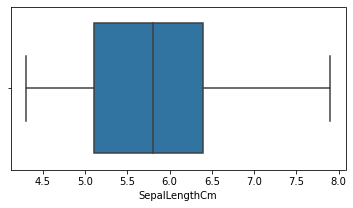

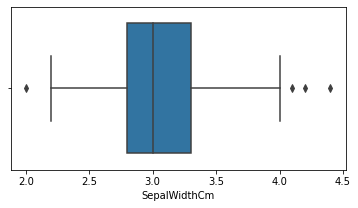

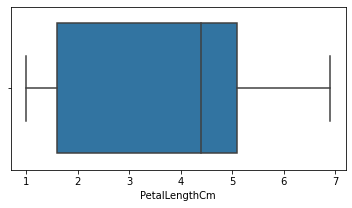

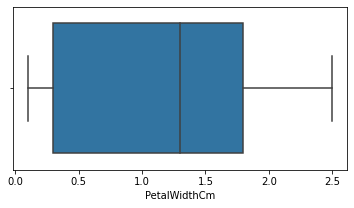

In [22]:
for i in data.columns:
    if data[i].dtype=="float":
        plt.figure(figsize=(6,3))
        sb.boxplot(data[i],color='tab:blue')
        plt.show()
    

# Treating outlier with IQR Technique

In [23]:
q1=data['SepalWidthCm'].quantile(0.25)
q2=data['SepalWidthCm'].quantile(0.75)
iqr=q2-q1
minimum=q1-1.5*iqr
maximum=q2+1.5*iqr
ind=data[(data['SepalWidthCm']>(maximum))|(data['SepalWidthCm']<(minimum))].index
for i in list(ind):
    data.drop(i,inplace=True)

In [24]:
data.shape # shape of the data after dropping the rows with outliers

(143, 5)

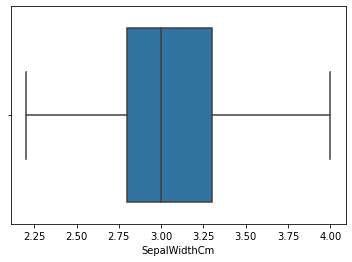

In [26]:
sb.boxplot(data['SepalWidthCm'],color='tab:blue');

 # Understanding data

Iris-versicolor    49
Iris-virginica     49
Iris-setosa        45
Name: Species, dtype: int64


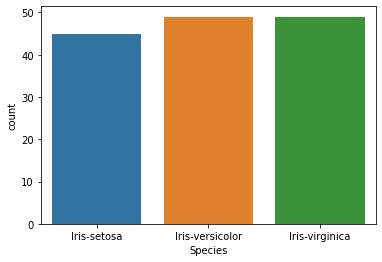

In [28]:
print(data.Species.value_counts())
sb.countplot(data.Species);

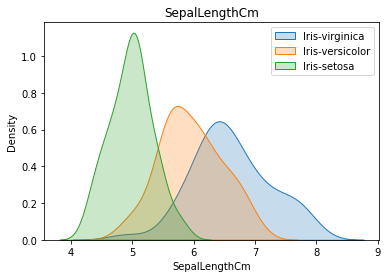

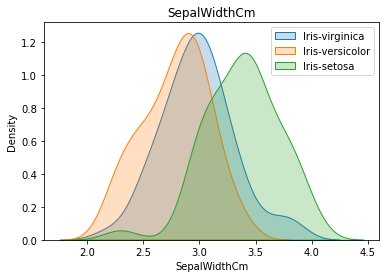

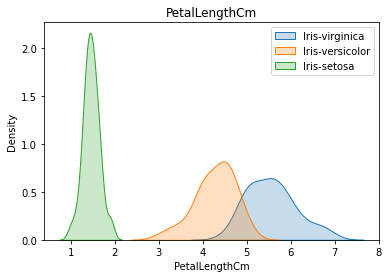

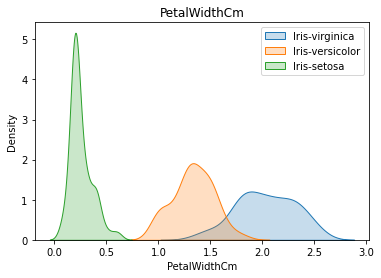

In [29]:
for i in data.columns[:-1]:
    sb.kdeplot(data.loc[data.Species=='Iris-virginica',i],shade='fill',label='Iris-virginica')
    sb.kdeplot(data.loc[data.Species=='Iris-versicolor',i],shade='fill',label='Iris-versicolor')
    sb.kdeplot(data.loc[data.Species=='Iris-setosa',i],shade='fill',label='Iris-setosa')
    plt.title(i)
    plt.legend()
    plt.show()

In [30]:
abs(data.corr()) #Calculating Coorelation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.113268,0.879015,0.821715
SepalWidthCm,0.113268,1.000000,0.396539,0.328102
PetalLengthCm,0.879015,0.396539,1.000000,0.960785
PetalWidthCm,0.821715,0.328102,0.960785,1.000000


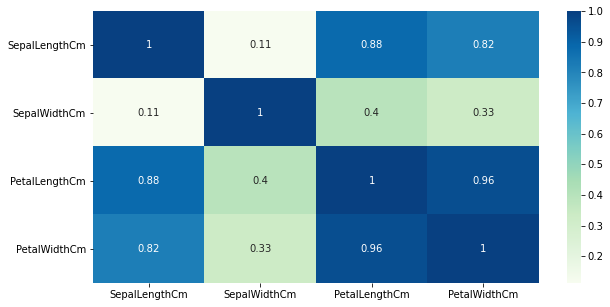

In [32]:
plt.figure(figsize=(10,5))
sb.heatmap(abs(data.corr()),cmap='GnBu',annot=True);

# Kmeans Clustering

In [33]:
#Kmeans Clustering
from sklearn.cluster import KMeans

In [34]:
#hyper-parameter tuning of n_clusters in Kmeans
l=[]
for i in range(1,10):# [1,2,3,4,5,6,7,8,9]
    algo=KMeans(i)
    algo.fit(data.iloc[:,:-1])
    l.append(algo.inertia_)#inertia_ is the sum of squared error

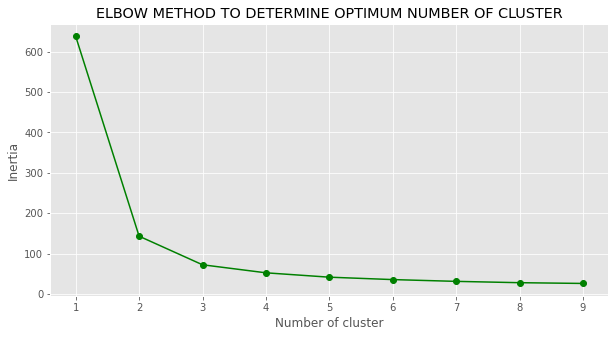

In [35]:
#using elbow method to find the optimum cluster
#select the cluster after which the inertia starts decreasing in a linear manner.
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(list(range(1,10)),l,'go-');
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('ELBOW METHOD TO DETERMINE OPTIMUM NUMBER OF CLUSTER');

In [36]:
algo=KMeans(3)
algo.fit(data.iloc[:,:-1])
cent=algo.cluster_centers_
lab=algo.labels_

In [37]:
lab #classes predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [38]:
data['cluster']=lab

In [39]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


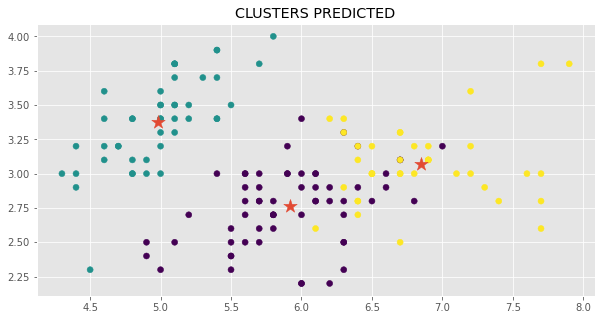

In [40]:
plt.style.use('ggplot');
plt.figure(figsize=(10,5));
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=lab);
plt.scatter(cent[:,0],cent[:,1],s=200,marker='*');
plt.title('CLUSTERS PREDICTED');

# Verifying the prediction the made by KMeans

0    60
1    45
2    38
Name: cluster, dtype: int64
Iris-versicolor    49
Iris-virginica     49
Iris-setosa        45
Name: Species, dtype: int64


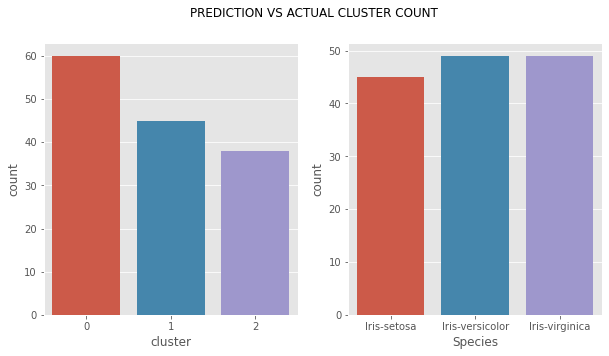

In [42]:
print(data['cluster'].value_counts(),data['Species'].value_counts(),sep='\n')

fig,ax=plt.subplots(1,2,figsize=(10,5))

sb.countplot(data.cluster,ax=ax[0]);

sb.countplot(data['Species'],ax=ax[1]);

fig.suptitle('PREDICTION VS ACTUAL CLUSTER COUNT');

Iris-setosa    45
Name: Species, dtype: int64
1    45
Name: cluster, dtype: int64


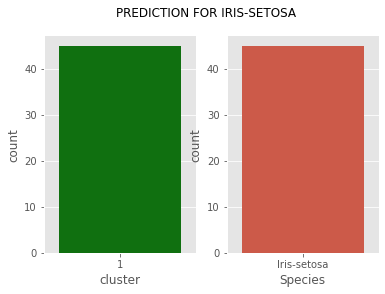

In [44]:
#Iris-Setosa has been predicted with 100 % accuracy

print(data[data.Species=='Iris-setosa']['Species'].value_counts())

print(data[data.Species=='Iris-setosa'].cluster.value_counts())

fig,ax=plt.subplots(1,2)

sb.countplot(data[data.Species=='Iris-setosa'].cluster,ax=ax[0],color='green');

sb.countplot(data[data.Species=='Iris-setosa']['Species'],ax=ax[1]);

fig.suptitle('PREDICTION FOR IRIS-SETOSA');

Iris-virginica    49
Name: Species, dtype: int64
2    36
0    13
Name: cluster, dtype: int64


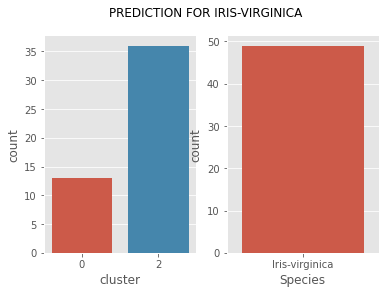

In [45]:
#There are error in clustering in Iris-virginica
print(data[data.Species=='Iris-virginica']['Species'].value_counts())

print(data[data.Species=='Iris-virginica'].cluster.value_counts())

fig,ax=plt.subplots(1,2)

sb.countplot(data[data.Species=='Iris-virginica'].cluster,ax=ax[0]);

sb.countplot(data[data.Species=='Iris-virginica']['Species'],ax=ax[1]);

fig.suptitle('PREDICTION FOR IRIS-VIRGINICA');

Iris-versicolor    49
Name: Species, dtype: int64
0    47
2     2
Name: cluster, dtype: int64


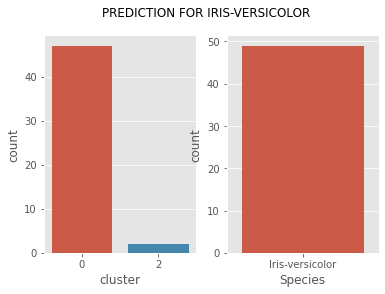

In [46]:
#There are error in clustering in Iris-versicolor
print(data[data.Species=='Iris-versicolor']['Species'].value_counts())

print(data[data.Species=='Iris-versicolor'].cluster.value_counts())

fig,ax=plt.subplots(1,2)

sb.countplot(data[data.Species=='Iris-versicolor'].cluster,ax=ax[0]);

sb.countplot(data[data.Species=='Iris-versicolor']['Species'],ax=ax[1]);

fig.suptitle('PREDICTION FOR IRIS-VERSICOLOR');

In [47]:
data['Species_encoded']=data.Species.apply(lambda x: 0 if x=='Iris-versicolor' else 2 if x=='Iris-virginica' else 1 )

In [48]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2,2
147,6.3,2.5,5.0,1.9,Iris-virginica,0,2
148,6.5,3.0,5.2,2.0,Iris-virginica,2,2


# ACCURACY OF 90% IS ACHIEVED

In [49]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        49
           1       1.00      1.00      1.00        45
           2       0.95      0.73      0.83        49

    accuracy                           0.90       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.90      0.89       143

